In [10]:
# Install TensorFlow (if not already installed)
!pip install tensorflow


In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


In [12]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Check shape of dataset
print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)


Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


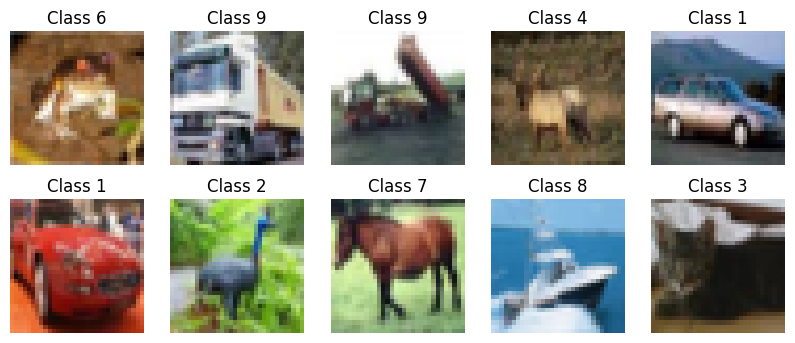

In [13]:
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i])
    plt.title(f"Class {y_train[i].argmax()}")
    plt.axis('off')
plt.show()


In [14]:
model = Sequential([
    # First Convolutional Layer
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D((2,2)),

    # Second Convolutional Layer
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    # Third Convolutional Layer
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    # Flatten and Fully Connected Layers
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Summary of the model
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,202 (625.79 KB)

 Trainable params: 160,202 (625.79 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [16]:
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=64,
                    validation_split=0.2)


Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 65s 93ms/step - accuracy: 0.2514 - loss: 1.9826 - val_accuracy: 0.4820 - val_loss: 1.4154
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 93ms/step - accuracy: 0.4814 - loss: 1.4314 - val_accuracy: 0.5601 - val_loss: 1.2206
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 90ms/step - accuracy: 0.5572 - loss: 1.2461 - val_accuracy: 0.6144 - val_loss: 1.0909
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 97ms/step - accuracy: 0.6020 - loss: 1.1260 - val_accuracy: 0.6435 - val_loss: 1.0105
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 92ms/step - accuracy: 0.6339 - loss: 1.0378 - val_accuracy: 0.6594 - val_loss: 0.9635
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 90ms/step - accuracy: 0.6683 - loss: 0.9558 - val_accuracy: 0.6593 - val_loss: 0.9723
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 93ms/step - accuracy: 0.6812 - loss: 0.9140 - val_accuracy: 0.6591 - val_loss: 0.9672
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 91ms/step - accuracy: 0.6981 - loss: 0.8653 - 

In [17]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.7221 - loss: 0.9024
Test Accuracy: 0.7222999930381775


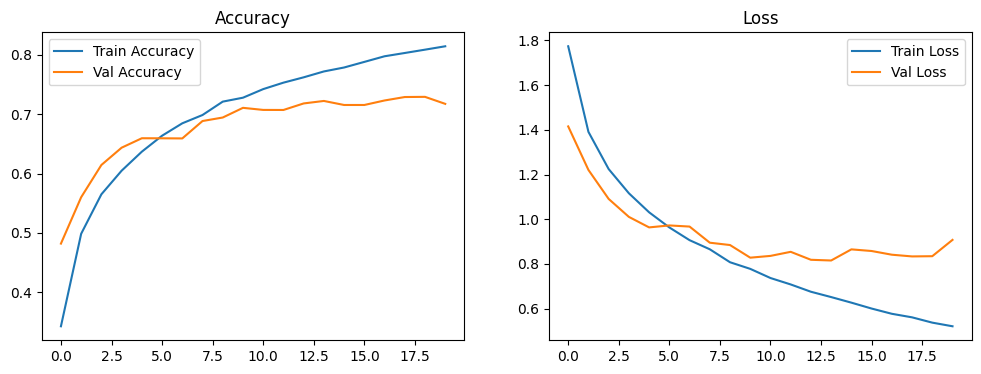

In [18]:
plt.figure(figsize=(12,4))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy')

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')

plt.show()


Summary

Dataset: CIFAR-10 (32x32 color images, 10 classes)

Preprocessing: Normalize pixel values, one-hot encode labels.

CNN Architecture:

3 Conv2D + MaxPooling layers

Flatten → Dense → Dropout → Output Dense

Optimizer: Adam

Loss Function: Categorical Crossentropy

Training: 20 epochs, batch size 64

Evaluation: Accuracy ~70–75% (can improve with data augmentation)